Model 1 Test Data Analysis
==========================
Table of Contents
-----------------
1. [Data Loading](#Data-Loading)
2. [Latitudinal Analysis](#Latitudinal-Analysis)
3. [Longitudinal Analysis](#Longitudinal-Analysis)
4. [Time Series Analysis](#Time-Series-Analysis)
5. [Export Statistics](#Export-Statistics)

In [258]:
# Libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [259]:
# Set the style of the visualization
sns.set_theme(style="darkgrid", palette="hls")
palette = sns.color_palette("hls", 8)

palette

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

In [260]:
# Set the model number for the model that was trained, and the number of models that were trained, and the model architecture file name
modelNum = 1
numModels = 1
modelArch = None

# Data Loading

In [261]:
df = pd.read_csv(f'../Models/Model_{modelNum}/Model_{modelNum}_TestData.csv')
df.head()

,Lat,Lon,Alt,Precip (mm),Temp (°C),Year,JulianDaySin,O18 (‰) Actual,H2 (‰) Actual,O18 (‰) Predicted,H2 (‰) Predicted
0,37.302680,-2.901980,1773.0,0.000000,554.302100,2016.0,-0.271958,-12.13,-82.30,-9.175214,-63.488710
1,28.220000,-177.370000,13.0,136.000000,26.300000,1974.0,-0.213521,-1.81,-5.20,-1.088409,-1.546110
2,47.120000,9.490000,450.0,4.274954,555.598486,2013.0,-0.974100,-13.70,-102.15,-9.598681,-68.047630
3,46.398641,6.233804,436.0,0.000000,553.571753,2020.0,-0.711657,-7.92,-56.84,-10.350645,-73.997280
4,-7.315278,72.428056,1.0,578.000000,573.957068,1987.0,0.951057,-3.04,-15.50,-4.571165,-25.942806


## Preparing the dataframe for analysis
Currently the dataframe looks good but in order to preform some analysis we will need to clean it up just a bit. We will start by converting the date to a datetime object and then by changing column names to not include units of measurement.

In [262]:
# Convert Year and Julian Sine Day to a single date
df['JulianDay'] = np.ceil((np.arcsin(df['JulianDaySin']) / np.pi + 0.5) * 365).astype(int)
df['Year'] = df['Year'].astype(int)

# Combine the Year and Julian Day into a single date
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '/' + df['JulianDay'].astype(str), format='%Y/%j')

In [263]:
# Remove the Year and Julian Day columns
df = df.drop(['Year', 'JulianDay', 'JulianDaySin'], axis=1)

In [264]:
# Cycle through the column names and change the names to be more usable in code
import re
oldColumns = df.columns
codeCols = list(map(lambda x: re.sub(r'\(.*?\)', '', x), oldColumns))

# Cycle through the column names and change ones that end in Actual or Predicted to be more usable in code (remove the word Actual or Predicted)
codeCols = list(map(lambda x: re.sub(r' Actual', 'A', x), codeCols))
codeCols = list(map(lambda x: re.sub(r' Predicted', 'P', x), codeCols))
codeCols = list(map(lambda x: x.strip(), codeCols))

# Create a dictionary to map the old column names to the new column names

# Rename the columns
df = df.rename(columns=dict(zip(oldColumns, codeCols)))

# Set the Date column as the index
df = df.set_index('Date')

# Sort the columns by date
df = df.sort_index()

df

,Lat,Lon,Alt,Precip,Temp,O18 A,H2 A,O18 P,H2 P
Date,,,,,,,,,
1960-04-03,51.930000,-10.250000,9.0,60.0,14.800000,-3.700,-23.00,-4.531493,-29.158308
1961-01-27,22.316667,114.166667,66.0,31.0,25.800000,-5.500,-49.00,-4.193994,-24.466526
1961-01-27,-40.350000,-9.880000,54.0,290.0,9.400000,-2.700,-14.90,-3.876350,-20.788540
1961-01-27,31.183333,29.950000,7.0,34.0,21.800000,-5.700,-26.70,-2.897123,-13.187976
1961-01-27,19.880000,102.130000,305.0,76.0,23.100000,-11.400,-79.90,-7.478314,-53.350815
...,...,...,...,...,...,...,...,...,...
2022-12-24,47.816667,13.717778,1618.0,0.6,557.845496,-8.647,-86.07,-9.961754,-70.736496
2022-12-29,47.816667,13.717778,1618.0,0.7,554.424078,-6.318,-38.49,-9.958141,-70.685330
2022-12-31,47.816667,13.717778,1618.0,13.4,555.377814,-15.763,-119.83,-10.219426,-72.771080


In [265]:
# Group by latitude and longitude and calculate mean and standard deviation
dfStats = df.groupby(['Lat', 'Lon']).agg(
    {
        'O18 A': ['mean', 'std'],
        'O18 P': ['mean', 'std'],
        'H2 A': ['mean', 'std'],
        'H2 P': ['mean', 'std']
    }
).reset_index()

# Flatten the MultiIndex columns
dfStats.columns = ['_'.join(col).strip() for col in dfStats.columns.values]

# Rename the columns for clarity
dfStats.columns = [
    'Lat', 'Lon', 
    'O18 A_mean', 'O18 A_std', 
    'O18 P_mean', 'O18 P_std', 
    'H2 A_mean', 'H2 A_std', 
    'H2 P_mean', 'H2 P_std'
]

# Latitudinal Analysis
----------------------
Assessing the data by latitude

## O18 vs Latitude

Text(0, 0.5, 'O18‰')

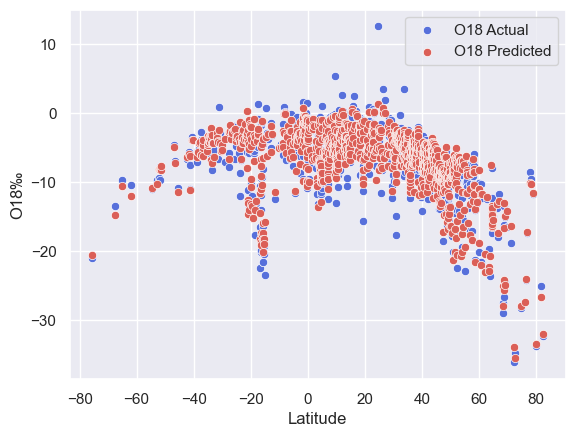

In [266]:
# Scatter plots of O18 Actual vs Predicted
plt.clf()
sns.scatterplot(data=dfStats, x='Lat', y='O18 A_mean', color=palette[5], label='O18 Actual')
sns.scatterplot(data=dfStats, x='Lat', y='O18 P_mean', color=palette[0], label='O18 Predicted') 

# Graph settings
plt.legend()
plt.xlabel('Latitude')
plt.ylabel('O18\u2030')


## H2 vs Latitude

Text(0, 0.5, 'H2‰')

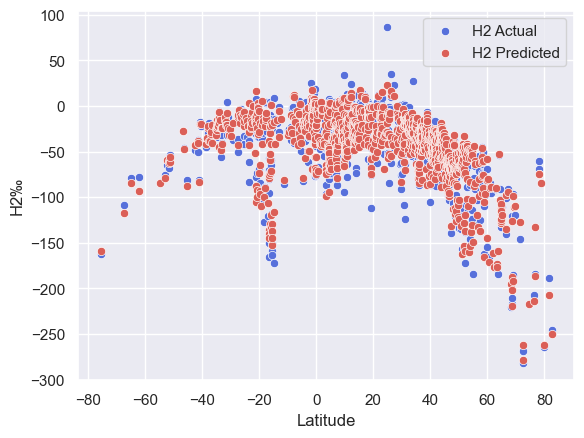

In [267]:
# Scatter plots of O18 Actual vs Predicted
plt.clf()
sns.scatterplot(data=dfStats, x='Lat', y='H2 A_mean', color=palette[5], label='H2 Actual')
sns.scatterplot(data=dfStats, x='Lat', y='H2 P_mean', color=palette[0], label='H2 Predicted') 

# Graph settings
plt.legend()
plt.xlabel('Latitude')
plt.ylabel('H2\u2030')

# Longitudinal Analysis
-----------------------
Assessing the data by longitude to see how well the model is able to predict the data at different longitudes.

## O18 vs Longitude

Text(0, 0.5, 'O18‰')

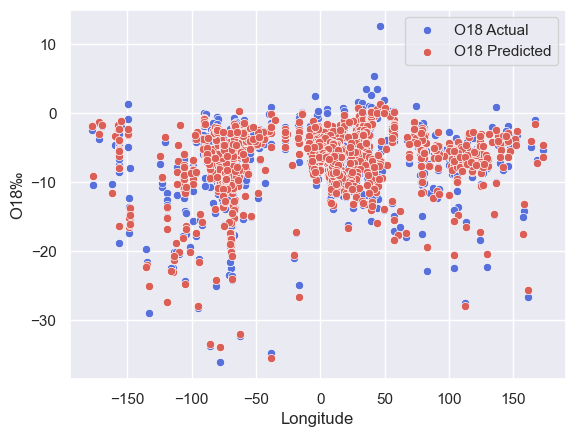

In [268]:
# Scatter plots of O18 Actual vs Predicted
plt.clf()
sns.scatterplot(data=dfStats, x='Lon', y='O18 A_mean', color=palette[5], label='O18 Actual')
sns.scatterplot(data=dfStats, x='Lon', y='O18 P_mean', color=palette[0], label='O18 Predicted')

# Graph settings
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('O18\u2030')

## H2 vs Longitude

Text(0, 0.5, 'H2‰')

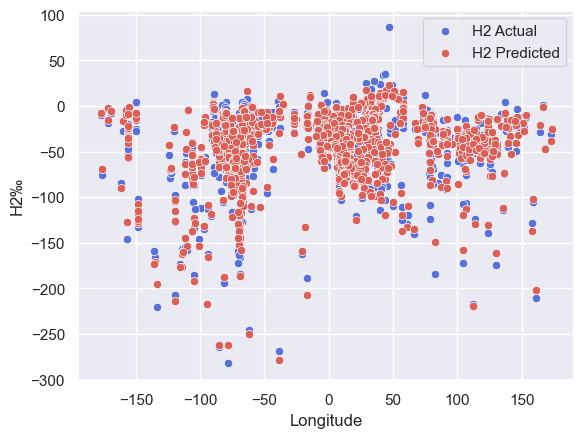

In [269]:
# Scatter plots of H2 Actual vs Predicted
plt.clf()
sns.scatterplot(data=dfStats, x='Lon', y='H2 A_mean', color=palette[5], label='H2 Actual')
sns.scatterplot(data=dfStats, x='Lon', y='H2 P_mean', color=palette[0], label='H2 Predicted')

# Graph settings
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('H2\u2030')

# Time Series Analysis

## Predicted vs Actual
We will start by just looking at the predicted vs actual values for the entire dataset on both isotopes.

Text(0, 0.5, 'O18‰ Predicted')

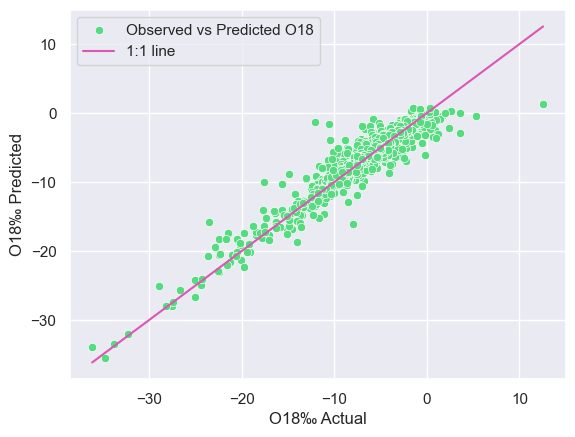

In [270]:
# Scatter plots of O18 Actual vs Predicted
plt.clf()
sns.scatterplot(data=dfStats, x='O18 A_mean', y='O18 P_mean', color=palette[3], label='Observed vs Predicted O18')
sns.lineplot(x=dfStats['O18 A_mean'], y=dfStats['O18 A_mean'], color=palette[7], label='1:1 line')

# Graph settings
plt.legend()
plt.xlabel('O18\u2030 Actual')
plt.ylabel('O18\u2030 Predicted')

Text(0, 0.5, 'H2‰ Predicted')

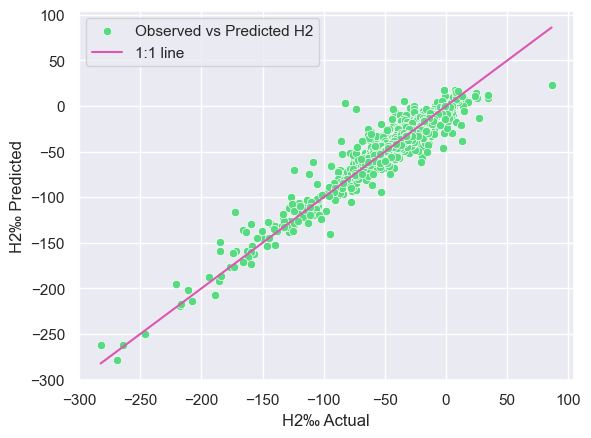

In [271]:
## Scatter plots of H2 Actual vs Predicted
plt.clf()
sns.scatterplot(data=dfStats, x='H2 A_mean', y='H2 P_mean', color=palette[3], label='Observed vs Predicted H2')
sns.lineplot(x=dfStats['H2 A_mean'], y=dfStats['H2 A_mean'], color=palette[7], label='1:1 line')

# Graph settings
plt.legend()
plt.xlabel('H2\u2030 Actual')
plt.ylabel('H2\u2030 Predicted')

## Date and Time Analysis
Starting by grouping the original data by latitude and longitude and then by date and time to see how the model is performing over time.

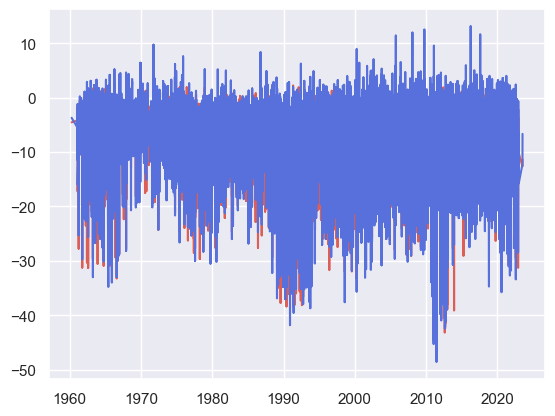

In [272]:
# Plot the O18 Actual and Predicted values 
plt.plot(df['O18 P'], color=palette[0], label='Predicted')
plt.plot(df['O18 A'], color=palette[5], label='Actual')

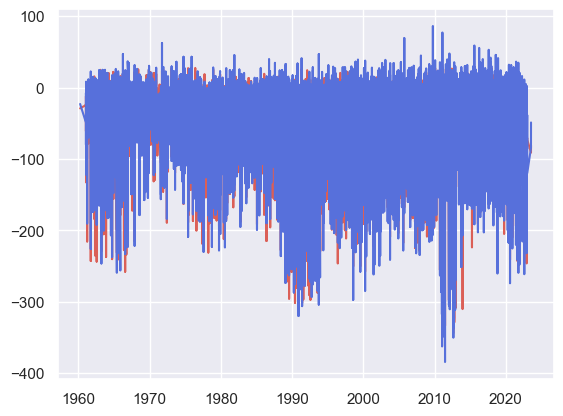

In [273]:
# Plot the H2 Actual and Predicted values
plt.plot(df['H2 P'], color=palette[0], label='Predicted')
plt.plot(df['H2 A'], color=palette[5], label='Actual')

# Export Statistics
We will export the statistics for the model to a csv file for further analysis.

In [274]:
# Create a function that takes in a predicted and actual values and returns the KGE assuming pandas dataframes
def calculate_kge(actual, predicted):
    # Calculate the mean of the actual and predicted values
    meanActual = actual.mean()
    meanPredicted = predicted.mean()
    beta = meanPredicted / meanActual

    # Calculate the standard deviation of the actual and predicted values
    stdActual = actual.std()
    stdPredicted = predicted.std()
    alpha = stdPredicted / stdActual

    # Calculate the correlation between the actual and predicted values
    correlation = predicted.corr(actual)

    # Calculate the Kling-Gupta Efficiency
    kge = 1 - np.sqrt((alpha - 1) ** 2 + (beta - 1) ** 2 + (correlation - 1) ** 2)
    
    return kge

In [275]:
# Create a function that takes in a predicted and actual values and returns the RMSE assuming pandas dataframes
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

In [276]:
# Create a new stats dataframe to store the KGE and RMSE values for all isotopes across all models (lat, lon)
stats = pd.DataFrame(columns=['O18 KGE', 'H2 KGE', 'O18 RMSE', 'H2 RMSE'])

stats['O18 KGE'] = df.groupby(['Lat', 'Lon']).apply(lambda x: calculate_kge(x['O18 A'], x['O18 P']))
stats['H2 KGE'] = df.groupby(['Lat', 'Lon']).apply(lambda x: calculate_kge(x['H2 A'], x['H2 P']))
stats['O18 RMSE'] = df.groupby(['Lat', 'Lon']).apply(lambda x: calculate_rmse(x['O18 A'], x['O18 P']))
stats['H2 RMSE'] = df.groupby(['Lat', 'Lon']).apply(lambda x: calculate_rmse(x['H2 A'], x['H2 P']))

stats

c:\Users\jaxgr\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\jaxgr\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\jaxgr\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\jaxgr\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\jaxgr\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\jaxgr\AppData\Local\Programs\Pytho

,,O18 KGE,H2 KGE,O18 RMSE,H2 RMSE
Lat,Lon,,,,
-75.583333,-20.566667,0.845546,0.867529,2.344744,18.343770
-67.570000,-68.130000,0.246189,0.308503,2.681399,17.116405
-65.079444,-63.977500,0.183087,0.224161,2.915581,19.477860
-62.120000,-58.560000,-0.498990,-0.365527,3.808455,32.361382
-54.780000,-68.280000,-0.222276,-0.208748,1.548685,11.380235
...,...,...,...,...,...
78.250000,11.916667,-0.002100,0.039069,1.902797,15.262411
78.916667,11.933333,0.282560,0.297163,2.284731,16.571665
80.000000,-85.560000,0.555399,0.625581,3.022394,21.158157


In [277]:
# Create a function that will only be used if there are multiple models it will find the correct model 
# This function will take in a dataframe and modelName (and geometry) and return the KGE and RMSE values
# within the architecture of the modelName
def modelStats_loc(df, modelName, modelArch):
    # Load the model architecture
    arch = pd.read_csv(f'../Data/ModelSplit_Arch/{modelArch}')
    # Convert the arch to a geodataframe
    arch = gpd.GeoDataFrame(arch, geometry=gpd.GeoSeries.from_wkt(arch['Geometry']), crs='EPSG:4326')
    arch.set_index('Prevailing Wind', inplace=True)
    arch.drop(columns=['Geometry'], inplace=True)

    # Convert the df to a geodataframe
    df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Lon, df.Lat), crs='EPSG:4326')
    
    df = df[df.within(arch.geometry.loc[modelName])] # Filter the dataframe to only include the points within the model geometry

    # Convert the df back to a dataframe
    return pd.DataFrame(df).drop(columns=['geometry'])

In [278]:
# Finally I will export the stats dataframe to a csv file or and excel file with each sheet being a different model 
# if there are multiple models that were trained
if numModels > 1:
    # Load the model architecture
    arch = pd.read_csv(f'../Data/ModelSplit_Arch/{modelArch}')
    # Convert the arch to a geodataframe
    arch = gpd.GeoDataFrame(arch, geometry=gpd.GeoSeries.from_wkt(arch['Geometry']), crs='EPSG:4326')
    arch.set_index('Prevailing Wind', inplace=True)
    arch.drop(columns=['Geometry'], inplace=True)
    with pd.ExcelWriter(f'Model_{modelNum}_Stats.xlsx') as writer:
        for modelName in list(arch.index):
            modelstats = modelStats_loc(stats.reset_index(), modelName, modelArch)
            modelstats.to_excel(writer, sheet_name=modelName)
else:
    stats.to_csv(f'Model_{modelNum}_Stats.csv', index=False)